Nayeli Jaime

# Task 1: Define the Problem
Dataset: https://data.cms.gov/provider-data/topics/hospitals
- The datasets being used are the **IPFQR_QualityMeasures_Facility.csv** and **Hospital_General_Information.csv**
- The Inpatient Psychiatric Facility Quality Reporting (IPFQR) Program is a program aimed to provide public information regarding inpatient psychiatric care. This information contains quality measures used to assess and promote the improvement of care provided to patients with mental illnesses. 
    - What is Inpatient care? Inpatient care is the care of patients whose condition requires admission to a hospital, i.e., all the care they need is provided within their living facilites. 
- The Hospital General Information contains facilitiy ratings formualted by HCHAPS Survey Results. 
    - HCAHPS Star Ratings provide a quick summary of each HCAHPS measure in a format that allows consumers to more easily compare hospitals. The HCAHPS Summary Star Rating is a roll-up of all the HCAHPS Star Ratings.
    - **Not all Hospital have a summarizing star rating. Thus, using specific quality measures and hospitals that hold a 5 star rating, I will create a machine learning model that will rank unrated hospitals either 5 star worth or not 5 star worthy.** 


# Task 2: Install/ Import Needed Libraries

In [1]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
#For data cleaning and visualizations
import pandas as pd
import numpy as np
from numpy.random import Generator, PCG64
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [4]:
# For machine learning model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 
from sklearn.ensemble import RandomForestClassifier

# Task 3: Load the Data

In [5]:
df = pd.read_csv("IPFQR_QualityMeasures_Facility.csv", na_values = "Not Available")

## Show the Data

In [6]:
df.head(2)

Facility ID                Facility Name              Address     City  \
0        10007     MIZELL MEMORIAL HOSPITAL        702 N MAIN ST      OPP   
1        10008  CRENSHAW COMMUNITY HOSPITAL  101 HOSPITAL CIRCLE  LUVERNE   

  State  ZIP Code County Name      HBIPS-2 Measure Description  \
0    AL     36467   COVINGTON  Hours of physical-restraint use   
1    AL     36049    CRENSHAW  Hours of physical-restraint use   

   HBIPS-2 Overall Rate Per 1000  HBIPS-2 Overall Num  ...  IMM-2 Denominator  \
0                           0.00                  0.0  ...              160.0   
1                           0.04                  3.7  ...              250.0   

   IMM-2 Footnote Flu Season Start Date  Flu Season End Date  \
0             NaN            10/01/2020           03/31/2021   
1             NaN            10/01/2020           03/31/2021   

              IPFQR-HCP COVID-19 Measure Description  IPFQR-HCP COVID-19 %  \
0  Percentage of healthcare personnel who complet...                  59.8   
1  Percentage of healthcare personnel who complet...                  53.2   

   IPFQR-HCP COVID-19 Denominator IPFQR-HCP COVID-19 Footnote  \
0                            32.0                         NaN   
1                           180.0                         NaN   

   IPFQR-HCP COVID-19 Start Date  IPFQR-HCP COVID-19 End Date  
0                     10/01/2021                   12/31/2021  
1                     10/01/2021                   12/31/2021  

[2 rows x 99 columns]

In [7]:
df.describe()

Facility ID     ZIP Code  HBIPS-2 Overall Rate Per 1000  \
count    1563.000000   1563.00000                    1481.000000   
mean   257879.604607  47674.81190                       0.446921   
std    147513.655051  27978.16239                       2.785906   
min     10007.000000    623.00000                       0.000000   
25%    140058.000000  26171.00000                       0.000000   
50%    250081.000000  45220.00000                       0.050000   
75%    380016.000000  71877.50000                       0.200000   
max    670093.000000  99801.00000                      61.270000   

       HBIPS-2 Overall Num  HBIPS-2 Overall Den  HBIPS-2 Overall Footnote  \
count          1481.000000          1481.000000                 82.000000   
mean            134.615172         21510.039163                  5.317073   
std             593.503297         58497.101156                  0.734982   
min               0.000000             8.000000                  5.000000   
25%               0.420000          3595.000000                  5.000000   
50%              13.000000          7859.000000                  5.000000   
75%              64.050000         21216.000000                  5.000000   
max            9408.500000        878736.000000                  7.000000   

       HBIPS-3 Overall Rate Per 1000  HBIPS-3 Overall Num  \
count                    1481.000000          1481.000000   
mean                        0.324591           130.551823   
std                         1.796255           905.363897   
min                         0.000000             0.000000   
25%                         0.000000             0.000000   
50%                         0.020000             4.450000   
75%                         0.150000            48.420000   
max                        51.440000         29644.580000   

       HBIPS-3 Overall Den  HBIPS-3 Overall Footnote  ...  READM-30-IPF Rate  \
count          1481.000000                 82.000000  ...        1359.000000   
mean          21510.039163                  5.317073  ...          20.339294   
std           58497.101156                  0.734982  ...           2.875123   
min               8.000000                  5.000000  ...          12.700000   
25%            3595.000000                  5.000000  ...          18.300000   
50%            7859.000000                  5.000000  ...          20.100000   
75%           21216.000000                  5.000000  ...          22.100000   
max          878736.000000                  7.000000  ...          37.900000   

       READM-30-IPF Lower Estimate  READM-30-IPF Higher Estimate  \
count                   1359.00000                   1359.000000   
mean                      16.27167                     25.169610   
std                        2.89566                      3.098291   
min                        9.20000                     15.200000   
25%                       14.20000                     23.200000   
50%                       16.00000                     25.100000   
75%                       17.90000                     27.000000   
max                       34.20000                     42.800000   

       READM-30-IPF Footnote      IMM-2 %  IMM-2 Denominator  IMM-2 Footnote  \
count             204.000000  1448.000000        1448.000000      115.000000   
mean                3.411765    80.226519         280.261740        4.652174   
std                 1.961968    25.292835         233.145555        2.004571   
min                 1.000000     0.000000          11.000000        1.000000   
25%                 1.000000    73.000000         146.750000        5.000000   
50%                 5.000000    91.000000         285.500000        5.000000   
75%                 5.000000    98.000000         329.250000        5.000000   
max                 5.000000   100.000000        3256.000000        7.000000   

       IPFQR-HCP COVID-19 %  IPFQR-HCP COVID-19 Denominator  \
count           1370.000000       

## Get Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 99 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Facility ID                             1563 non-null   int64  
 1   Facility Name                           1563 non-null   object 
 2   Address                                 1563 non-null   object 
 3   City                                    1563 non-null   object 
 4   State                                   1563 non-null   object 
 5   ZIP Code                                1563 non-null   int64  
 6   County Name                             1563 non-null   object 
 7   HBIPS-2 Measure Description             1563 non-null   object 
 8   HBIPS-2 Overall Rate Per 1000           1481 non-null   float64
 9   HBIPS-2 Overall Num                     1481 non-null   float64
 10  HBIPS-2 Overall Den                     1481 non-null   floa

In [9]:
df['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

## Find Missing Values

In [10]:
df.isnull().values.sum()

37735

# Task 4: Perform Data Cleaning

The focus of my project is on the quality of mental health resources nationwide by analyzing the information provided by the Inpatient Psychiatric Facility Quality Reporting (IPFQR) Program and HCAHPS Summary Facilitiy Rating.

### Cleaning IPFQR Dataset first

Meaures regarding this scope include (using Measure ID):
1. **FUH-7**: Follow-up after Hospitalization for Mental Illness 7-Days.
2. **FUH-30**: Follow-up after Hospitalization for Mental Illness 30-Days.
3. **HBIPS-2**: Hours of physical restraint use
4. **HBIPS-3**: Hours of seclusion. 
5. **HBIPS-5**: Patients discharged on multiple antipsychotic medications with appropriate justification.
6. **MedCont**: Patients admitted to an inpatient psychiatric facility for major depressive disorder (MDD), schizophrenia, or bipolar disorder who filled at least one prescription between the 2 days before they were discharged and 30 days after they were discharged from the facility. 
7. **READM-30-IPF**: Rate of readmission to facility within 30 days of discharge.
8. **SUB-2**: Alcohol use brief intervention provided or offered.
9. **SUB-3**: Alcohol and other Drug Use Disorder Treatment Provided or Offered at Discharge
10. **TOB-2**: Tobacco Use Treatment Provided or Offered
11. **TOB-3**: Tobacco use treatment provided or offered at discharge
12. **SMD**: Screening for Metabolic Disorders
13. **TR2**: Timely Transmission of Transition Record

A majority of these measures already contain a percentage that demonstrates what percentage of those within the facility have fallen under a specific measure. Thus, we can structure the data cleaning in the following way:
- Drop columns outside of the scope set above.
- Examine "footnotes"
- Create percentages of measures that do not already have a percentage. 
- Drop columns that are not the percentages. 
- Handle Nulls

In [11]:
#Drop not needed columns from dataset (i.e. columns that are outside the scope and descriptions)
df.columns

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'HBIPS-2 Measure Description',
       'HBIPS-2 Overall Rate Per 1000', 'HBIPS-2 Overall Num',
       'HBIPS-2 Overall Den', 'HBIPS-2 Overall Footnote',
       'HBIPS-3 Measure Description', 'HBIPS-3 Overall Rate Per 1000',
       'HBIPS-3 Overall Num', 'HBIPS-3 Overall Den',
       'HBIPS-3 Overall Footnote', 'HBIPS-5 Measure Description', 'HBIPS-5 %',
       'HBIPS-5 Denominator', 'HBIPS-5 Footnote', 'SMD Measure Description',
       'SMD %', 'SMD Denominator', 'SMD Footnote',
       'SUB-2/-2a Measure Description', 'SUB-2 %', 'SUB-2 Denominator',
       'SUB-2 Footnote', 'SUB-2a %', 'SUB-2a Denominator', 'SUB-2a Footnote',
       'SUB-3/-3a Measure Description', 'SUB-3 %', 'SUB-3 Denominator',
       'SUB-3 Footnote', 'SUB-3a %', 'SUB-3a Denominator', 'SUB-3a Footnote',
       'TOB-2/-2a Measure_Desc', 'TOB-2 %', 'TOB-2 Denominator',
       'TOB-2 Footnote', 'TOB-2a %', 'TOB-2a Denomi

In [12]:
df.drop(columns = ['Address',
       'County Name', 'HBIPS-2 Measure Description',
       'HBIPS-3 Measure Description', 'HBIPS-5 Measure Description', 'SMD Measure Description',
       'SUB-2/-2a Measure Description', 'SUB-2a %', 'SUB-2a Denominator', 'SUB-2a Footnote',
       'SUB-3/-3a Measure Description', 'SUB-3a %', 'SUB-3a Denominator', 'SUB-3a Footnote',
       'TOB-2/-2a Measure_Desc', 'TOB-2a %', 'TOB-2a Denominator', 'TOB-2a Footnote',
       'TOB-3/-3a Measure Description', 'TOB-3a %', 'TOB-3a Denominator', 'TOB-3a Footnote',
       'TR-1 Measure Description', 'TR-1 %', 'TR-1 Denominator',
       'TR-1 Footnote', 'TR-2 Measure Description',
       'FUH Measure Description','MedCont Measure Desc', 'READM-30-IPF Measure Desc', 'READM-30-IPF Category','IMM-2 Measure Description', 'IMM-2 %', 'IMM-2 Denominator',
       'IMM-2 Footnote', 'Flu Season Start Date', 'Flu Season End Date',
       'IPFQR-HCP COVID-19 Measure Description', 'IPFQR-HCP COVID-19 %',
       'IPFQR-HCP COVID-19 Denominator', 'IPFQR-HCP COVID-19 Footnote',
       'IPFQR-HCP COVID-19 Start Date', 'IPFQR-HCP COVID-19 End Date' ], inplace = True) 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Facility ID                    1563 non-null   int64  
 1   Facility Name                  1563 non-null   object 
 2   City                           1563 non-null   object 
 3   State                          1563 non-null   object 
 4   ZIP Code                       1563 non-null   int64  
 5   HBIPS-2 Overall Rate Per 1000  1481 non-null   float64
 6   HBIPS-2 Overall Num            1481 non-null   float64
 7   HBIPS-2 Overall Den            1481 non-null   float64
 8   HBIPS-2 Overall Footnote       82 non-null     float64
 9   HBIPS-3 Overall Rate Per 1000  1481 non-null   float64
 10  HBIPS-3 Overall Num            1481 non-null   float64
 11  HBIPS-3 Overall Den            1481 non-null   float64
 12  HBIPS-3 Overall Footnote       82 non-null     f

In [14]:
#The footnotes contained in the hospital dataset are reasonsing behind missing records. 
#We can see the unique footnotes that exist to understand why certain records are missing:
np.unique(df[['HBIPS-2 Overall Footnote', 'HBIPS-3 Overall Footnote', 'HBIPS-5 Footnote', 'SMD Footnote', 'SUB-2 Footnote', 'SUB-3 Footnote', 'TOB-2 Footnote', 'TOB-3 Footnote','TR-2 Footnote', 'FUH-30 Footnote', 'FUH-7 Footnote','MedCont Footnote', 'READM-30-IPF Footnote' ]].values)

array([ 1.,  5.,  7., nan])

There are 3 unique footnote values (nan is indicative of a null value, i.e., no footnote is provide because records are not missing in these areas):
- 1: The number of cases/patients is too few to report.
- 5: Results are not available for this reporting period.
- 7: No cases met the criteria for this measure. 

Keeping the footnotes for now, let's modify the hospital dataframe and create a new column from the Num/Den (or rather the numerator and denominator) and create a percentage for each measure (and drop these columns after creating the new percentage columns). We can also drop the denominator columns of measures that already have a percentage.

In [15]:
df.columns

Index(['Facility ID', 'Facility Name', 'City', 'State', 'ZIP Code',
       'HBIPS-2 Overall Rate Per 1000', 'HBIPS-2 Overall Num',
       'HBIPS-2 Overall Den', 'HBIPS-2 Overall Footnote',
       'HBIPS-3 Overall Rate Per 1000', 'HBIPS-3 Overall Num',
       'HBIPS-3 Overall Den', 'HBIPS-3 Overall Footnote', 'HBIPS-5 %',
       'HBIPS-5 Denominator', 'HBIPS-5 Footnote', 'SMD %', 'SMD Denominator',
       'SMD Footnote', 'SUB-2 %', 'SUB-2 Denominator', 'SUB-2 Footnote',
       'SUB-3 %', 'SUB-3 Denominator', 'SUB-3 Footnote', 'TOB-2 %',
       'TOB-2 Denominator', 'TOB-2 Footnote', 'TOB-3 %', 'TOB-3 Denominator',
       'TOB-3 Footnote', 'TR-2 %', 'TR-2 Denominator', 'TR-2 Footnote',
       'Start Date', 'End Date', 'FUH-30 %', 'FUH-30 Denominator',
       'FUH-30 Footnote', 'FUH-7 %', 'FUH-7 Denominator', 'FUH-7 Footnote',
       'FUH Measure Start Date', 'FUH Measure End Date', 'MedCont %',
       'MedCont Denominator', 'MedCont Footnote', 'MedCont Measure Start Date',
       'MedCont

In [16]:
#Creating HBIPS-2 % and HBIPS-3 %
df['HBIPS-2 %'] = round(100*(df['HBIPS-2 Overall Num']/df['HBIPS-2 Overall Den']),2)
df['HBIPS-3 %'] = round(100*(df['HBIPS-3 Overall Num']/df['HBIPS-3 Overall Den']),2)

In [17]:
df['HBIPS-2 %'].max()

147.05

In [18]:
df.loc[df['HBIPS-3 %'] == 123.46]

Facility ID              Facility Name     City State  ZIP Code  \
1508       500064  HARBORVIEW MEDICAL CENTER  SEATTLE    WA     98104   

      HBIPS-2 Overall Rate Per 1000  HBIPS-2 Overall Num  HBIPS-2 Overall Den  \
1508                          16.33               9408.5              24012.0   

      HBIPS-2 Overall Footnote  HBIPS-3 Overall Rate Per 1000  ...  \
1508                       NaN                          51.44  ...   

      MedCont Measure End Date  READM-30-IPF Denominator  READM-30-IPF Rate  \
1508                12/01/2019                     231.0               15.5   

      READM-30-IPF Lower Estimate  READM-30-IPF Higher Estimate  \
1508                         12.4                          19.0   

      READM-30-IPF Footnote  READM-30-IPF Start Date  READM-30-IPF End Date  \
1508                    NaN               07/01/2018             12/01/2019   

      HBIPS-2 %  HBIPS-3 %  
1508      39.18     123.46  

[1 rows x 58 columns]

There are some percentages greater than 100% that will be left as is because it is unclear what has attributed to these high rates. Whether it is because of a typo in the dataset or a true portrayal of how the facility is run. 

In [19]:
#Dropping the Num/Den columns remaining
df.drop(columns = ['HBIPS-2 Overall Num', 'HBIPS-2 Overall Den', 'HBIPS-3 Overall Num', 'HBIPS-3 Overall Den', 'HBIPS-5 Denominator', 'SMD Denominator', 'SUB-2 Denominator', 'SUB-3 Denominator', 'TOB-2 Denominator', 'TOB-3 Denominator','TR-2 Denominator', 'FUH-30 Denominator', 'FUH-7 Denominator', 'MedCont Denominator', 'READM-30-IPF Denominator', 'READM-30-IPF Lower Estimate', 'READM-30-IPF Higher Estimate'], inplace = True) 

In [20]:
#Dropping rest of the not needed columns
df.drop(columns = ['HBIPS-2 Overall Rate Per 1000', 'HBIPS-3 Overall Rate Per 1000', 'Start Date', 'End Date', 
                         'FUH Measure Start Date', 'FUH Measure End Date', 'MedCont Measure Start Date', 'MedCont Measure End Date',
                         'READM-30-IPF Start Date', 'READM-30-IPF End Date'], inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Facility ID               1563 non-null   int64  
 1   Facility Name             1563 non-null   object 
 2   City                      1563 non-null   object 
 3   State                     1563 non-null   object 
 4   ZIP Code                  1563 non-null   int64  
 5   HBIPS-2 Overall Footnote  82 non-null     float64
 6   HBIPS-3 Overall Footnote  82 non-null     float64
 7   HBIPS-5 %                 997 non-null    float64
 8   HBIPS-5 Footnote          566 non-null    float64
 9   SMD %                     1469 non-null   float64
 10  SMD Footnote              94 non-null     float64
 11  SUB-2 %                   1150 non-null   float64
 12  SUB-2 Footnote            413 non-null    float64
 13  SUB-3 %                   1189 non-null   float64
 14  SUB-3 Fo

There are many nulls in the hospital dataframe. However, we should not simply drop the nulls because we will lose a lot of information. 

Let's see if we can input information into the nulls using the information provided by the footnotes. 

Revisiting the footnotes:
- 1: The number of cases/patients is too few to report.
- 5: Results are not available for this reporting period.
- 7: No cases met the criteria for this measure. 

In [22]:
df.describe()

Facility ID     ZIP Code  HBIPS-2 Overall Footnote  \
count    1563.000000   1563.00000                 82.000000   
mean   257879.604607  47674.81190                  5.317073   
std    147513.655051  27978.16239                  0.734982   
min     10007.000000    623.00000                  5.000000   
25%    140058.000000  26171.00000                  5.000000   
50%    250081.000000  45220.00000                  5.000000   
75%    380016.000000  71877.50000                  5.000000   
max    670093.000000  99801.00000                  7.000000   

       HBIPS-3 Overall Footnote   HBIPS-5 %  HBIPS-5 Footnote        SMD %  \
count                 82.000000  997.000000        566.000000  1469.000000   
mean                   5.317073   62.735206          2.176678    78.797141   
std                    0.734982   31.563064          2.179686    25.950639   
min                    5.000000    0.000000          1.000000     0.000000   
25%                    5.000000   38.000000          1.000000    71.000000   
50%                    5.000000   70.000000          1.000000    90.000000   
75%                    5.000000   91.000000          1.000000    97.000000   
max                    7.000000  100.000000          7.000000   100.000000   

       SMD Footnote      SUB-2 %  SUB-2 Footnote  ...     FUH-30 %  \
count     94.000000  1150.000000      413.000000  ...  1158.000000   
mean       4.510638    75.721739        3.135593  ...    50.175734   
std        1.776457    27.655863        2.644103  ...    15.521812   
min        1.000000     0.000000        1.000000  ...     0.000000   
25%        5.000000    64.000000        1.000000  ...    40.000000   
50%        5.000000    87.000000        1.000000  ...    50.000000   
75%        5.000000    97.000000        5.000000  ...    60.700000   
max        7.000000   100.000000        7.000000  ...   100.000000   

       FUH-30 Footnote      FUH-7 %  FUH-7 Footnote   MedCont %  \
count       405.000000  1158.000000      405.000000  792.000000   
mean          2.501235    28.104404        2.501235   73.786111   
std           1.939206    13.363834        1.939206    8.417053   
min           1.000000     0.000000        1.000000   34.300000   
25%           1.000000    18.200000        1.000000   68.900000   
50%           1.000000    26.900000        1.000000   74.800000   
75%           5.000000    36.600000        5.000000   79.625000   
max           5.000000    75.000000        5.000000   93.500000   

       MedCont Footnote  READM-30-IPF Rate  READM-30-IPF Footnote  \
count        771.000000        1359.000000             204.000000   
mean           1.700389          20.339294               3.411765   
std            1.531399           2.875123               1.961968   
min            1.000000          12.700000               1.000000   
25%            1.000000          18.300000               1.000000   
50%            1.000000          20.100000               5.000000   
75%            1.000000          22.100000               5.000000   
max            7.000000          37.900000               5.000000   

         HBIPS-2 %    HBIPS-3 %  
count  1481.000000  1481.000000  
mean      1.072417     0.779278  
std       6.686503     4.310939  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.110000     0.040000  
75%       0.480000     0.360000  
max     147.050000   123.460000  

[8 rows x 28 columns]

Based off the reasonsings, we can input 0 for row entries that have footnote 7 and input random values between (the 25th Percentile) Quartile 1 and (the 75th Percentile) Quartile 3 (to not skew the data by using the mean) for footnotes 1 & 5, so that we don't lose any valuable information from just dropping the nulls. 

We will use a random number generator and PCG64 to guarantee we will always produce the same random number stream. 

In [23]:
df.loc[df['HBIPS-2 Overall Footnote'] == 7, 'HBIPS-2 %'] = 0

In [24]:
hbips2_q1 = np.nanpercentile(df['HBIPS-2 %'], 25)
hbips2_q3 = np.nanpercentile(df['HBIPS-2 %'], 75)
hbips2_null_count = df['HBIPS-2 %'].isnull().sum()
rg = Generator(PCG64(1234))
hbips2_null_random_list = rg.uniform(hbips2_q1, hbips2_q3, size=hbips2_null_count).round(2)
df.loc[np.isnan(df['HBIPS-2 %']), 'HBIPS-2 %'] = hbips2_null_random_list
df['HBIPS-2 %'] = df['HBIPS-2 %'].astype(float)

In [25]:
df.head(2)

Facility ID                Facility Name     City State  ZIP Code  \
0        10007     MIZELL MEMORIAL HOSPITAL      OPP    AL     36467   
1        10008  CRENSHAW COMMUNITY HOSPITAL  LUVERNE    AL     36049   

   HBIPS-2 Overall Footnote  HBIPS-3 Overall Footnote  HBIPS-5 %  \
0                       NaN                       NaN      100.0   
1                       NaN                       NaN      100.0   

   HBIPS-5 Footnote  SMD %  ...  FUH-30 %  FUH-30 Footnote  FUH-7 %  \
0               NaN  100.0  ...       NaN              1.0      NaN   
1               NaN  100.0  ...      42.1              NaN      5.3   

   FUH-7 Footnote  MedCont %  MedCont Footnote  READM-30-IPF Rate  \
0             1.0        NaN               1.0               17.8   
1             NaN       82.1               NaN               21.5   

   READM-30-IPF Footnote  HBIPS-2 %  HBIPS-3 %  
0                    NaN       0.00       0.00  
1                    NaN       0.09       0.38  

[2 rows x 31 columns]

In [26]:
#Checking to see if we cleared all the nulls from HBIPS-2 %
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Facility ID               1563 non-null   int64  
 1   Facility Name             1563 non-null   object 
 2   City                      1563 non-null   object 
 3   State                     1563 non-null   object 
 4   ZIP Code                  1563 non-null   int64  
 5   HBIPS-2 Overall Footnote  82 non-null     float64
 6   HBIPS-3 Overall Footnote  82 non-null     float64
 7   HBIPS-5 %                 997 non-null    float64
 8   HBIPS-5 Footnote          566 non-null    float64
 9   SMD %                     1469 non-null   float64
 10  SMD Footnote              94 non-null     float64
 11  SUB-2 %                   1150 non-null   float64
 12  SUB-2 Footnote            413 non-null    float64
 13  SUB-3 %                   1189 non-null   float64
 14  SUB-3 Fo

Now we can fill in the nulls for the rest of columns according to their footnotes and then drop the footnotes.

In [27]:
#HBIPS-3 %
df.loc[df['HBIPS-3 Overall Footnote'] == 7, 'HBIPS-3 %'] = 0

In [28]:
hbips3_q1 = np.nanpercentile(df['HBIPS-3 %'], 25)
hbips3_q3 = np.nanpercentile(df['HBIPS-3 %'], 75)
hbips3_null_count = df['HBIPS-3 %'].isnull().sum()
rg = Generator(PCG64(1234))
hbips3_null_random_list = rg.uniform(hbips3_q1, hbips3_q3, size=hbips3_null_count).round(2)
df.loc[np.isnan(df['HBIPS-3 %']), 'HBIPS-3 %'] = hbips3_null_random_list
df['HBIPS-3 %'] = df['HBIPS-3 %'].astype(float)

In [29]:
#HBIPS-5 %
df.loc[df['HBIPS-5 Footnote'] == 7, 'HBIPS-5 %'] = 0

In [30]:
hbips5_q1 = np.nanpercentile(df['HBIPS-5 %'], 25)
hbips5_q3 = np.nanpercentile(df['HBIPS-5 %'], 75)
hbips5_null_count = df['HBIPS-5 %'].isnull().sum()
rg = Generator(PCG64(1234))
hbips5_null_random_list = rg.uniform(hbips5_q1, hbips5_q3, size=hbips5_null_count).round(2)
df.loc[np.isnan(df['HBIPS-5 %']), 'HBIPS-5 %'] = hbips5_null_random_list
df['HBIPS-5 %'] = df['HBIPS-5 %'].astype(float)

In [31]:
#SMD %
df.loc[df['SMD Footnote'] == 7, 'SMD %'] = 0

In [32]:
smd_q1 = np.nanpercentile(df['SMD %'], 25)
smd_q3 = np.nanpercentile(df['SMD %'], 75)
smd_null_count = df['SMD %'].isnull().sum()
rg = Generator(PCG64(1234))
smd_null_random_list = rg.uniform(smd_q1, smd_q3, size=smd_null_count).round(2)
df.loc[np.isnan(df['SMD %']), 'SMD %'] = smd_null_random_list
df['SMD %'] = df['SMD %'].astype(float)

In [33]:
#SUB-2 %
df.loc[df['SUB-2 Footnote'] == 7, 'SUB-2 %'] = 0

In [34]:
sub2_q1 = np.nanpercentile(df['SUB-2 %'], 25)
sub2_q3 = np.nanpercentile(df['SUB-2 %'], 75)
sub2_null_count = df['SUB-2 %'].isnull().sum()
rg = Generator(PCG64(1234))
sub2_null_random_list = rg.uniform(sub2_q1, sub2_q3, size=sub2_null_count).round(2)
df.loc[np.isnan(df['SUB-2 %']), 'SUB-2 %'] = sub2_null_random_list
df['SUB-2 %'] = df['SUB-2 %'].astype(float)

In [35]:
#SUB-3 %
df.loc[df['SUB-3 Footnote'] == 7, 'SUB-3 %'] = 0

In [36]:
sub3_q1 = np.nanpercentile(df['SUB-3 %'], 25)
sub3_q3 = np.nanpercentile(df['SUB-3 %'], 75)
sub3_null_count = df['SUB-3 %'].isnull().sum()
rg = Generator(PCG64(1234))
sub3_null_random_list = rg.uniform(sub3_q1, sub3_q3, size=sub3_null_count).round(2)
df.loc[np.isnan(df['SUB-3 %']), 'SUB-3 %'] = sub3_null_random_list
df['SUB-3 %'] = df['SUB-3 %'].astype(float)

In [37]:
#TOB-2 %
df.loc[df['TOB-2 Footnote'] == 7, 'TOB-2 %'] = 0

In [38]:
tob2_q1 = np.nanpercentile(df['TOB-2 %'], 25)
tob2_q3 = np.nanpercentile(df['TOB-2 %'], 75)
tob2_null_count = df['TOB-2 %'].isnull().sum()
rg = Generator(PCG64(1234))
tob2_null_random_list = rg.uniform(tob2_q1, tob2_q3, size=tob2_null_count).round(2)
df.loc[np.isnan(df['TOB-2 %']), 'TOB-2 %'] = tob2_null_random_list
df['TOB-2 %'] = df['TOB-2 %'].astype(float)

In [39]:
#TOB-3 %
df.loc[df['TOB-3 Footnote'] == 7, 'TOB-3 %'] = 0

In [40]:
tob3_q1 = np.nanpercentile(df['TOB-3 %'], 25)
tob3_q3 = np.nanpercentile(df['TOB-3 %'], 75)
tob3_null_count =df['TOB-3 %'].isnull().sum()
rg = Generator(PCG64(1234))
tob3_null_random_list = rg.uniform(tob3_q1, tob3_q3, size=tob3_null_count).round(2)
df.loc[np.isnan(df['TOB-3 %']), 'TOB-3 %'] = tob3_null_random_list
df['TOB-3 %'] = df['TOB-3 %'].astype(float)

In [41]:
#TR-2 %
df.loc[df['TR-2 Footnote'] == 7, 'TR-2 %'] = 0

In [42]:
tr2_q1 = np.nanpercentile(df['TR-2 %'], 25)
tr2_q3 = np.nanpercentile(df['TR-2 %'], 75)
tr2_null_count = df['TR-2 %'].isnull().sum()
rg = Generator(PCG64(1234))
tr2_null_random_list = rg.uniform(tr2_q1, tr2_q3, size=tr2_null_count).round(2)
df.loc[np.isnan(df['TR-2 %']), 'TR-2 %'] = tr2_null_random_list
df['TR-2 %'] = df['TR-2 %'].astype(float)

In [43]:
#FUH-30 % 
df.loc[df['FUH-30 Footnote'] == 7, 'FUH-30 %'] = 0

In [44]:
fuh30_q1 = np.nanpercentile(df['FUH-30 %'], 25)
fuh30_q3 = np.nanpercentile(df['FUH-30 %'], 75)
fuh30_null_count = df['FUH-30 %'].isnull().sum()
rg = Generator(PCG64(1234))
fuh30_null_random_list = rg.uniform(fuh30_q1, fuh30_q3, size=fuh30_null_count).round(2)
df.loc[np.isnan(df['FUH-30 %']), 'FUH-30 %'] = fuh30_null_random_list
df['FUH-30 %'] = df['FUH-30 %'].astype(float)

In [45]:
#FUH-7 %
df.loc[df['FUH-7 Footnote'] == 7, 'FUH-7 %'] = 0

In [46]:
fuh7_q1 = np.nanpercentile(df['FUH-7 %'], 25)
fuh7_q3 = np.nanpercentile(df['FUH-7 %'], 75)
fuh7_null_count = df['FUH-7 %'].isnull().sum()
rg = Generator(PCG64(1234))
fuh7_null_random_list = rg.uniform(fuh7_q1, fuh7_q3, size=fuh7_null_count).round(2)
df.loc[np.isnan(df['FUH-7 %']), 'FUH-7 %'] = fuh7_null_random_list
df['FUH-7 %'] = df['FUH-7 %'].astype(float)

In [47]:
#MedCont %
df.loc[df['MedCont Footnote'] == 7, 'MedCont %'] = 0

In [48]:
med_q1 = np.nanpercentile(df['MedCont %'], 25)
med_q3 = np.nanpercentile(df['MedCont %'], 75)
med_null_count = df['MedCont %'].isnull().sum()
rg = Generator(PCG64(1234))
med_null_random_list = rg.uniform(med_q1, med_q3, size=med_null_count).round(2)
df.loc[np.isnan(df['MedCont %']), 'MedCont %'] = med_null_random_list
df['MedCont %'] = df['MedCont %'].astype(float)

In [49]:
#READM-30-IPF Rate
df.loc[df['READM-30-IPF Footnote'] == 7, 'READM-30-IPF Rate'] = 0

In [50]:
readm_q1 = np.nanpercentile(df['READM-30-IPF Rate'], 25)
readm_q3 = np.nanpercentile(df['READM-30-IPF Rate'], 75)
readm_null_count = df['READM-30-IPF Rate'].isnull().sum()
rg = Generator(PCG64(1234))
readm_null_random_list = rg.uniform(readm_q1, readm_q3, size=readm_null_count).round(2)
df.loc[np.isnan(df['READM-30-IPF Rate']), 'READM-30-IPF Rate'] = readm_null_random_list
df['READM-30-IPF Rate'] = df['READM-30-IPF Rate'].astype(float)

In [51]:
df.drop(columns = ['HBIPS-2 Overall Footnote', 'HBIPS-3 Overall Footnote', 'HBIPS-5 Footnote', 'SMD Footnote', 'SUB-2 Footnote','SUB-3 Footnote','TOB-2 Footnote','TOB-3 Footnote','TR-2 Footnote', 'FUH-30 Footnote', 'FUH-7 Footnote','MedCont Footnote','READM-30-IPF Footnote'], inplace = True) 

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Facility ID        1563 non-null   int64  
 1   Facility Name      1563 non-null   object 
 2   City               1563 non-null   object 
 3   State              1563 non-null   object 
 4   ZIP Code           1563 non-null   int64  
 5   HBIPS-5 %          1563 non-null   float64
 6   SMD %              1563 non-null   float64
 7   SUB-2 %            1563 non-null   float64
 8   SUB-3 %            1563 non-null   float64
 9   TOB-2 %            1563 non-null   float64
 10  TOB-3 %            1563 non-null   float64
 11  TR-2 %             1563 non-null   float64
 12  FUH-30 %           1563 non-null   float64
 13  FUH-7 %            1563 non-null   float64
 14  MedCont %          1563 non-null   float64
 15  READM-30-IPF Rate  1563 non-null   float64
 16  HBIPS-2 %          1563 

In [53]:
df.isnull().sum()

Facility ID          0
Facility Name        0
City                 0
State                0
ZIP Code             0
HBIPS-5 %            0
SMD %                0
SUB-2 %              0
SUB-3 %              0
TOB-2 %              0
TOB-3 %              0
TR-2 %               0
FUH-30 %             0
FUH-7 %              0
MedCont %            0
READM-30-IPF Rate    0
HBIPS-2 %            0
HBIPS-3 %            0
dtype: int64

# Task 5: Conceptualize the Problem

Create a machine learning model that will learn from these measures and rate unrated hospitals either 5 stars or not 5 stars.

In [54]:
hospital = pd.read_csv("Hospital_General_Information.csv", engine='python')

In [55]:
hospital.head(2)

Facility ID                    Facility Name                     Address  \
0      010001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1      010005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   

     City State  ZIP Code County Name    Phone Number         Hospital Type  \
0  DOTHAN    AL     36301     HOUSTON  (334) 793-8701  Acute Care Hospitals   
1    BOAZ    AL     35957    MARSHALL  (256) 593-8310  Acute Care Hospitals   

                            Hospital Ownership  ...  \
0  Government - Hospital District or Authority  ...   
1  Government - Hospital District or Authority  ...   

  Count of READM Measures Better Count of READM Measures No Different  \
0                              0                                   10   
1                              0                                   10   

  Count of READM Measures Worse READM Group Footnote  \
0                             1                  NaN   
1                             0                  NaN   

  Pt Exp Group Measure Count Count of Facility Pt Exp Measures  \
0                          8                                 8   
1                          8                                 8   

  Pt Exp Group Footnote TE Group Measure Count Count of Facility TE Measures  \
0                   NaN                     12                             9   
1                   NaN                     12                            11   

  TE Group Footnote  
0               NaN  
1               NaN  

[2 rows x 38 columns]

In [56]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Facility ID                                            5307 non-null   object
 1   Facility Name                                          5307 non-null   object
 2   Address                                                5307 non-null   object
 3   City                                                   5307 non-null   object
 4   State                                                  5307 non-null   object
 5   ZIP Code                                               5307 non-null   int64 
 6   County Name                                            5307 non-null   object
 7   Phone Number                                           5307 non-null   object
 8   Hospital Type                                          530

In [57]:
hospital.isnull().sum()

Facility ID                                                 0
Facility Name                                               0
Address                                                     0
City                                                        0
State                                                       0
ZIP Code                                                    0
County Name                                                 0
Phone Number                                                0
Hospital Type                                               0
Hospital Ownership                                          0
Emergency Services                                          0
Meets criteria for promoting interoperability of EHRs    1339
Hospital overall rating                                     0
Hospital overall rating footnote                         3055
MORT Group Measure Count                                    0
Count of Facility MORT Measures                             0
Count of

In [58]:
# We will only need Facility ID, Facility Name, and the Hospital Overall Ratin 
h_rating = hospital[["Facility ID", "Facility Name", "Hospital overall rating"]]

In [59]:
h_rating.head()

Facility ID                    Facility Name Hospital overall rating
0      010001  SOUTHEAST HEALTH MEDICAL CENTER                       3
1      010005         MARSHALL MEDICAL CENTERS                       3
2      010006     NORTH ALABAMA MEDICAL CENTER                       2
3      010007         MIZELL MEMORIAL HOSPITAL                       3
4      010008      CRENSHAW COMMUNITY HOSPITAL           Not Available

In [60]:
#Fill in "Not Available" with -1
#Hospital Ratings with -1 will indicate missing ratings
h_rating.loc[h_rating['Hospital overall rating'] == "Not Available", 'Hospital overall rating'] = -1

/var/folders/6q/qdf21ymd471dgvtwtjd3fpsm0000gn/T/ipykernel_39009/720134645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_rating.loc[h_rating['Hospital overall rating'] == "Not Available", 'Hospital overall rating'] = -1


In [61]:
h_rating.head()

Facility ID                    Facility Name Hospital overall rating
0      010001  SOUTHEAST HEALTH MEDICAL CENTER                       3
1      010005         MARSHALL MEDICAL CENTERS                       3
2      010006     NORTH ALABAMA MEDICAL CENTER                       2
3      010007         MIZELL MEMORIAL HOSPITAL                       3
4      010008      CRENSHAW COMMUNITY HOSPITAL                      -1

In [62]:
h_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307 entries, 0 to 5306
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Facility ID              5307 non-null   object
 1   Facility Name            5307 non-null   object
 2   Hospital overall rating  5307 non-null   object
dtypes: object(3)
memory usage: 124.5+ KB


In [63]:
h_rating['Hospital overall rating'].unique()

array(['3', '2', -1, '4', '5', '1'], dtype=object)

We now have our rating system, where 1 is a poor performing hospital and 5 is a high performing hospital. A rating of -1 indicates a not rated hospital. 

## Add Latitude and Longitude to our datasets (for visualizations)

In [64]:
zip_codes = pd.read_csv("all_us_zipcodes.csv")

In [65]:
zip_codes.head(1)

code        city state   county  area_code        lat        lon
0   501  Holtsville    NY  SUFFOLK        NaN  40.922326 -72.637078

In [66]:
df_zip = pd.merge(df, zip_codes, how = "left", left_on='ZIP Code', right_on='code')

In [67]:
df_zip.head()

Facility ID                   Facility Name        City State  ZIP Code  \
0        10007        MIZELL MEMORIAL HOSPITAL         OPP    AL     36467   
1        10008     CRENSHAW COMMUNITY HOSPITAL     LUVERNE    AL     36049   
2        10011              ST. VINCENT'S EAST  BIRMINGHAM    AL     35235   
3        10012  DEKALB REGIONAL MEDICAL CENTER  FORT PAYNE    AL     35968   
4        10016   SHELBY BAPTIST MEDICAL CENTER   ALABASTER    AL     35007   

   HBIPS-5 %  SMD %  SUB-2 %  SUB-3 %  TOB-2 %  ...  READM-30-IPF Rate  \
0     100.00  100.0     96.0   100.00    100.0  ...               17.8   
1     100.00  100.0     21.0     3.00     95.0  ...               21.5   
2       0.00    5.0     28.0    15.00      2.0  ...               20.3   
3      88.60  100.0      0.0    92.83    100.0  ...               20.1   
4      52.81   95.0     90.0    95.00     84.0  ...               18.5   

   HBIPS-2 %  HBIPS-3 %     code        city  state     county  area_code  \
0       0.00       0.00  36467.0         Opp     AL  COVINGTON        NaN   
1       0.09       0.38  36049.0     Luverne     AL   CRENSHAW        NaN   
2       0.91       0.29  35235.0  Birmingham     AL  JEFFERSON        NaN   
3       0.00       0.00  35968.0  Fort Payne     AL    DE KALB        NaN   
4       0.00       0.00  35007.0   Alabaster     AL     SHELBY        NaN   

         lat        lon  
0  31.260401 -86.356208  
1  31.754655 -86.291595  
2  33.632816 -86.649293  
3  34.507242 -85.797851  
4  33.193415 -86.794377  

[5 rows x 25 columns]

In [68]:
df_zip.drop(columns = ['county','code', 'city', 'state', 'area_code'], inplace = True)

In [69]:
df_zip.isnull().sum()

Facility ID          0
Facility Name        0
City                 0
State                0
ZIP Code             0
HBIPS-5 %            0
SMD %                0
SUB-2 %              0
SUB-3 %              0
TOB-2 %              0
TOB-3 %              0
TR-2 %               0
FUH-30 %             0
FUH-7 %              0
MedCont %            0
READM-30-IPF Rate    0
HBIPS-2 %            0
HBIPS-3 %            0
lat                  9
lon                  9
dtype: int64

In [70]:
#Input the missing lat and long
df_zip.loc[df_zip['ZIP Code'] == 85392, 'lat'] = 33.435596
df_zip.loc[df_zip['ZIP Code'] == 85392, 'lon'] = -112.349602
df_zip.loc[df_zip['ZIP Code'] == 10065, 'lat'] = 40.764170
df_zip.loc[df_zip['ZIP Code'] == 10065, 'lon'] = -73.962365
df_zip.loc[df_zip['ZIP Code'] == 698, 'lat'] = 18.034964
df_zip.loc[df_zip['ZIP Code'] == 698, 'lon'] = -66.849898
df_zip.loc[df_zip['ZIP Code'] == 919, 'lat'] = 18.468300
df_zip.loc[df_zip['ZIP Code'] == 919, 'lon'] = -66.106100
df_zip.loc[df_zip['ZIP Code'] == 641, 'lat'] = 18.279721
df_zip.loc[df_zip['ZIP Code'] == 641, 'lon'] = -66.689096 
df_zip.loc[df_zip['ZIP Code'] == 739, 'lat'] = 18.176915
df_zip.loc[df_zip['ZIP Code'] == 739, 'lon'] = -66.153424
df_zip.loc[df_zip['ZIP Code'] == 928, 'lat'] = 18.468300
df_zip.loc[df_zip['ZIP Code'] == 928, 'lon'] = -66.106100
df_zip.loc[df_zip['ZIP Code'] == 623, 'lat'] = 18.040203
df_zip.loc[df_zip['ZIP Code'] == 623, 'lon'] = -67.146574
df_zip.loc[df_zip['ZIP Code'] == 705, 'lat'] = 18.135403
df_zip.loc[df_zip['ZIP Code'] == 705, 'lon'] = -66.260518 

In [71]:
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Facility ID        1563 non-null   int64  
 1   Facility Name      1563 non-null   object 
 2   City               1563 non-null   object 
 3   State              1563 non-null   object 
 4   ZIP Code           1563 non-null   int64  
 5   HBIPS-5 %          1563 non-null   float64
 6   SMD %              1563 non-null   float64
 7   SUB-2 %            1563 non-null   float64
 8   SUB-3 %            1563 non-null   float64
 9   TOB-2 %            1563 non-null   float64
 10  TOB-3 %            1563 non-null   float64
 11  TR-2 %             1563 non-null   float64
 12  FUH-30 %           1563 non-null   float64
 13  FUH-7 %            1563 non-null   float64
 14  MedCont %          1563 non-null   float64
 15  READM-30-IPF Rate  1563 non-null   float64
 16  HBIPS-2 %          1563 

In [72]:
df_zip.isnull().sum()

Facility ID          0
Facility Name        0
City                 0
State                0
ZIP Code             0
HBIPS-5 %            0
SMD %                0
SUB-2 %              0
SUB-3 %              0
TOB-2 %              0
TOB-3 %              0
TR-2 %               0
FUH-30 %             0
FUH-7 %              0
MedCont %            0
READM-30-IPF Rate    0
HBIPS-2 %            0
HBIPS-3 %            0
lat                  0
lon                  0
dtype: int64

In [73]:
df_zip.duplicated(['Facility ID']).sum()

0

In [74]:
h_rating.duplicated(['Facility ID']).sum()

0

### Now let's join the hospital ratings to the df_zip dataframe 

In [75]:
#Pull out both datasets to join using SQL
h_rating.to_csv("ratings.csv")
df_zip.to_csv("facilities.csv")

In [76]:
df_final = pd.read_csv("final.csv")

In [77]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Column1                    1563 non-null   int64  
 1   Facility ID                1563 non-null   int64  
 2   Facility Name              1563 non-null   object 
 3   City                       1563 non-null   object 
 4   State                      1563 non-null   object 
 5   ZIP Code                   1563 non-null   int64  
 6   HBIPS-5 %                  1563 non-null   float64
 7   SMD %                      1563 non-null   float64
 8   SUB-2 %                    1563 non-null   float64
 9   SUB-3 %                    1563 non-null   float64
 10  TOB-2 %                    1563 non-null   float64
 11  TOB-3 %                    1563 non-null   float64
 12  TR-2 %                     1563 non-null   float64
 13  FUH-30 %                   1563 non-null   float

In [78]:
df_final.columns

Index(['Column1', 'Facility ID', 'Facility Name', 'City', 'State', 'ZIP Code',
       'HBIPS-5 %', 'SMD %', 'SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %',
       'TR-2 %', 'FUH-30 %', 'FUH-7 %', 'MedCont %', 'READM-30-IPF Rate',
       'HBIPS-2 %', 'HBIPS-3 %', 'lat', 'lon', 'Hospital overall rating',
       'Column1.1', 'Facility ID.1', 'Facility Name.1',
       'Hospital overall rating.1'],
      dtype='object')

In [79]:
df_final.drop(columns = ['Column1', 'Facility ID', 'Hospital overall rating', 'Column1.1', 'Facility ID.1', 'Facility Name.1'], inplace = True)

In [80]:
df_final.head()

Facility Name        City State  ZIP Code  HBIPS-5 %  \
0        MIZELL MEMORIAL HOSPITAL         OPP    AL     36467     100.00   
1     CRENSHAW COMMUNITY HOSPITAL     LUVERNE    AL     36049     100.00   
2              ST. VINCENT'S EAST  BIRMINGHAM    AL     35235       0.00   
3  DEKALB REGIONAL MEDICAL CENTER  FORT PAYNE    AL     35968      88.60   
4   SHELBY BAPTIST MEDICAL CENTER   ALABASTER    AL     35007      52.81   

   SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  TR-2 %  FUH-30 %  FUH-7 %  \
0  100.0     96.0   100.00    100.0   100.00   100.0     60.22    36.17   
1  100.0     21.0     3.00     95.0    87.00   100.0     42.10     5.30   
2    5.0     28.0    15.00      2.0     3.00    63.0     39.20    20.30   
3  100.0      0.0    92.83    100.0    86.46    99.0     47.87    25.20   
4   95.0     90.0    95.00     84.0    61.00    78.0     39.40    15.20   

   MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  \
0      79.35               17.8       0.00       0.00  31.260401 -86.356208   
1      82.10               21.5       0.09       0.38  31.754655 -86.291595   
2      74.90               20.3       0.91       0.29  33.632816 -86.649293   
3      72.92               20.1       0.00       0.00  34.507242 -85.797851   
4      72.50               18.5       0.00       0.00  33.193415 -86.794377   

   Hospital overall rating.1  
0                          3  
1                         -1  
2                          2  
3                          3  
4                          4

In [81]:
df_final['Hospital overall rating'] = df_final['Hospital overall rating.1']

In [82]:
df_final.drop(columns = 'Hospital overall rating.1', inplace = True)

In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Facility Name            1563 non-null   object 
 1   City                     1563 non-null   object 
 2   State                    1563 non-null   object 
 3   ZIP Code                 1563 non-null   int64  
 4   HBIPS-5 %                1563 non-null   float64
 5   SMD %                    1563 non-null   float64
 6   SUB-2 %                  1563 non-null   float64
 7   SUB-3 %                  1563 non-null   float64
 8   TOB-2 %                  1563 non-null   float64
 9   TOB-3 %                  1563 non-null   float64
 10  TR-2 %                   1563 non-null   float64
 11  FUH-30 %                 1563 non-null   float64
 12  FUH-7 %                  1563 non-null   float64
 13  MedCont %                1563 non-null   float64
 14  READM-30-IPF Rate       

# Task 6: Machine Learning Model

## Prepare Data For Machine Learning

We will create a "Five Star" column with boolean responses in order to create our machine learning model.  
- 1: Has 5 stars
- 0: Does not have 5 stars

In [84]:
def categorise(row):  
    if row['Hospital overall rating'] == 5:
        return 1
    else:
        return 0

In [85]:
df_final['Five Stars'] = df_final.apply(lambda row: categorise(row), axis=1)

In [86]:
df_final.head(1)

Facility Name City State  ZIP Code  HBIPS-5 %  SMD %  SUB-2 %  \
0  MIZELL MEMORIAL HOSPITAL  OPP    AL     36467      100.0  100.0     96.0   

   SUB-3 %  TOB-2 %  TOB-3 %  ...  FUH-30 %  FUH-7 %  MedCont %  \
0    100.0    100.0    100.0  ...     60.22    36.17      79.35   

   READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  \
0               17.8        0.0        0.0  31.260401 -86.356208   

   Hospital overall rating  Five Stars  
0                        3           0  

[1 rows x 21 columns]

In [87]:
fac_w_rating = df_final[(df_final["Hospital overall rating"] == 1)|
                        (df_final["Hospital overall rating"] == 2)|
                        (df_final["Hospital overall rating"] == 3)|
                       (df_final["Hospital overall rating"] == 4)|
                        (df_final["Hospital overall rating"] == 5)]

In [88]:
fac_w_rating.head(2)

Facility Name        City State  ZIP Code  HBIPS-5 %  SMD %  \
0  MIZELL MEMORIAL HOSPITAL         OPP    AL     36467      100.0  100.0   
2        ST. VINCENT'S EAST  BIRMINGHAM    AL     35235        0.0    5.0   

   SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  ...  FUH-30 %  FUH-7 %  MedCont %  \
0     96.0    100.0    100.0    100.0  ...     60.22    36.17      79.35   
2     28.0     15.0      2.0      3.0  ...     39.20    20.30      74.90   

   READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  \
0               17.8       0.00       0.00  31.260401 -86.356208   
2               20.3       0.91       0.29  33.632816 -86.649293   

   Hospital overall rating  Five Stars  
0                        3           0  
2                        2           0  

[2 rows x 21 columns]

In [89]:
fac_w_rating.drop(columns = ['Hospital overall rating'], inplace = True)

/var/folders/6q/qdf21ymd471dgvtwtjd3fpsm0000gn/T/ipykernel_39009/2572926629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fac_w_rating.drop(columns = ['Hospital overall rating'], inplace = True)


In [90]:
fac_w_rating

Facility Name        City State  ZIP Code  HBIPS-5 %  \
0             MIZELL MEMORIAL HOSPITAL         OPP    AL     36467     100.00   
2                   ST. VINCENT'S EAST  BIRMINGHAM    AL     35235       0.00   
3       DEKALB REGIONAL MEDICAL CENTER  FORT PAYNE    AL     35968      88.60   
4        SHELBY BAPTIST MEDICAL CENTER   ALABASTER    AL     35007      52.81   
5                  DALE MEDICAL CENTER       OZARK    AL     36360     100.00   
...                                ...         ...   ...       ...        ...   
1541           AMERY HOSPITAL & CLINIC       AMERY    WI     54001      71.00   
1544           MEMORIAL MEDICAL CENTER     ASHLAND    WI     54806      75.00   
1557            CAMPBELL COUNTY HEALTH    GILLETTE    WY     82716       0.00   
1558  CHEYENNE REGIONAL MEDICAL CENTER    CHEYENNE    WY     82001      70.00   
1559         IVINSON MEMORIAL HOSPITAL     LARAMIE    WY     82072      62.75   

      SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  TR-2 %  FUH-30 %  FUH-7 %  \
0     100.0     96.0   100.00    100.0   100.00   100.0     60.22    36.17   
2       5.0     28.0    15.00      2.0     3.00    63.0     39.20    20.30   
3     100.0      0.0    92.83    100.0    86.46    99.0     47.87    25.20   
4      95.0     90.0    95.00     84.0    61.00    78.0     39.40    15.20   
5     100.0      7.0     0.00     91.0    88.00   100.0     42.90     7.10   
...     ...      ...      ...      ...      ...     ...       ...      ...   
1541   31.0     36.0    23.00     46.0    80.00    43.0     42.90     7.10   
1544   93.0    100.0   100.00     98.0     0.00    80.0     64.00    40.00   
1557   80.0     92.0    60.00     46.0    42.00     0.0     55.63    32.10   
1558   92.0     90.0    93.00     93.0    63.00    81.0     54.80    22.60   
1559   22.0    100.0    97.00     89.0    44.00    55.0     41.30    19.36   

      MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat  \
0         79.35               17.8       0.00       0.00  31.260401   
2         74.90               20.3       0.91       0.29  33.632816   
3         72.92               20.1       0.00       0.00  34.507242   
4         72.50               18.5       0.00       0.00  33.193415   
5         78.77               18.7       0.00       0.00  31.450171   
...         ...                ...        ...        ...        ...   
1541      77.65               20.7       0.18       0.00  45.348566   
1544      69.97               19.7       0.11       0.00  46.558577   
1557      78.35               17.8       0.00       0.00  44.377283   
1558      79.36               20.7       0.36       0.00  41.251730   
1559      74.61               17.9       0.00       0.00  41.582018   

             lon  Five Stars  
0     -86.356208           0  
2     -86.649293           0  
3     -85.797851           0  
4     -86.794377           0  
5     -85.651820           0  
...          ...         ...  
1541  -92.401379           0  
1544  -90.738773           1  
1557 -105.550237           0  
1558 -104.562640           0  
1559 -105.708717           0  

[894 rows x 20 columns]

In [91]:
fac_w_rating_cleaned = fac_w_rating.drop(columns = ['Facility Name', 'City', 'State', 'ZIP Code', 'lat', 'lon'])

In [92]:
fac_w_rating_cleaned.head(2)

HBIPS-5 %  SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  TR-2 %  FUH-30 %  \
0      100.0  100.0     96.0    100.0    100.0    100.0   100.0     60.22   
2        0.0    5.0     28.0     15.0      2.0      3.0    63.0     39.20   

   FUH-7 %  MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %  Five Stars  
0    36.17      79.35               17.8       0.00       0.00           0  
2    20.30      74.90               20.3       0.91       0.29           0

## Machine Learning Model: Decision Tree and Random Forest

In [93]:
len(df_final) - len(fac_w_rating)

669

There are over 600 hospitals unrated (have overall ratings of -1). Let's create a machine learning model that can learn from the data that *is* rated to rate the ones that are not rated. 

In [94]:
X = fac_w_rating_cleaned.drop('Five Stars', axis = 1)
Y = fac_w_rating_cleaned['Five Stars']

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [96]:
dtree = DecisionTreeClassifier()

In [97]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [98]:
predictions = dtree.predict(X_test)

In [99]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       200
           1       0.22      0.29      0.25        24

    accuracy                           0.81       224
   macro avg       0.57      0.58      0.57       224
weighted avg       0.84      0.81      0.82       224



In [100]:
print(confusion_matrix(Y_test, predictions))

[[175  25]
 [ 17   7]]


In [101]:
features = list(fac_w_rating_cleaned.columns[:13])
features

['HBIPS-5 %',
 'SMD %',
 'SUB-2 %',
 'SUB-3 %',
 'TOB-2 %',
 'TOB-3 %',
 'TR-2 %',
 'FUH-30 %',
 'FUH-7 %',
 'MedCont %',
 'READM-30-IPF Rate',
 'HBIPS-2 %',
 'HBIPS-3 %']

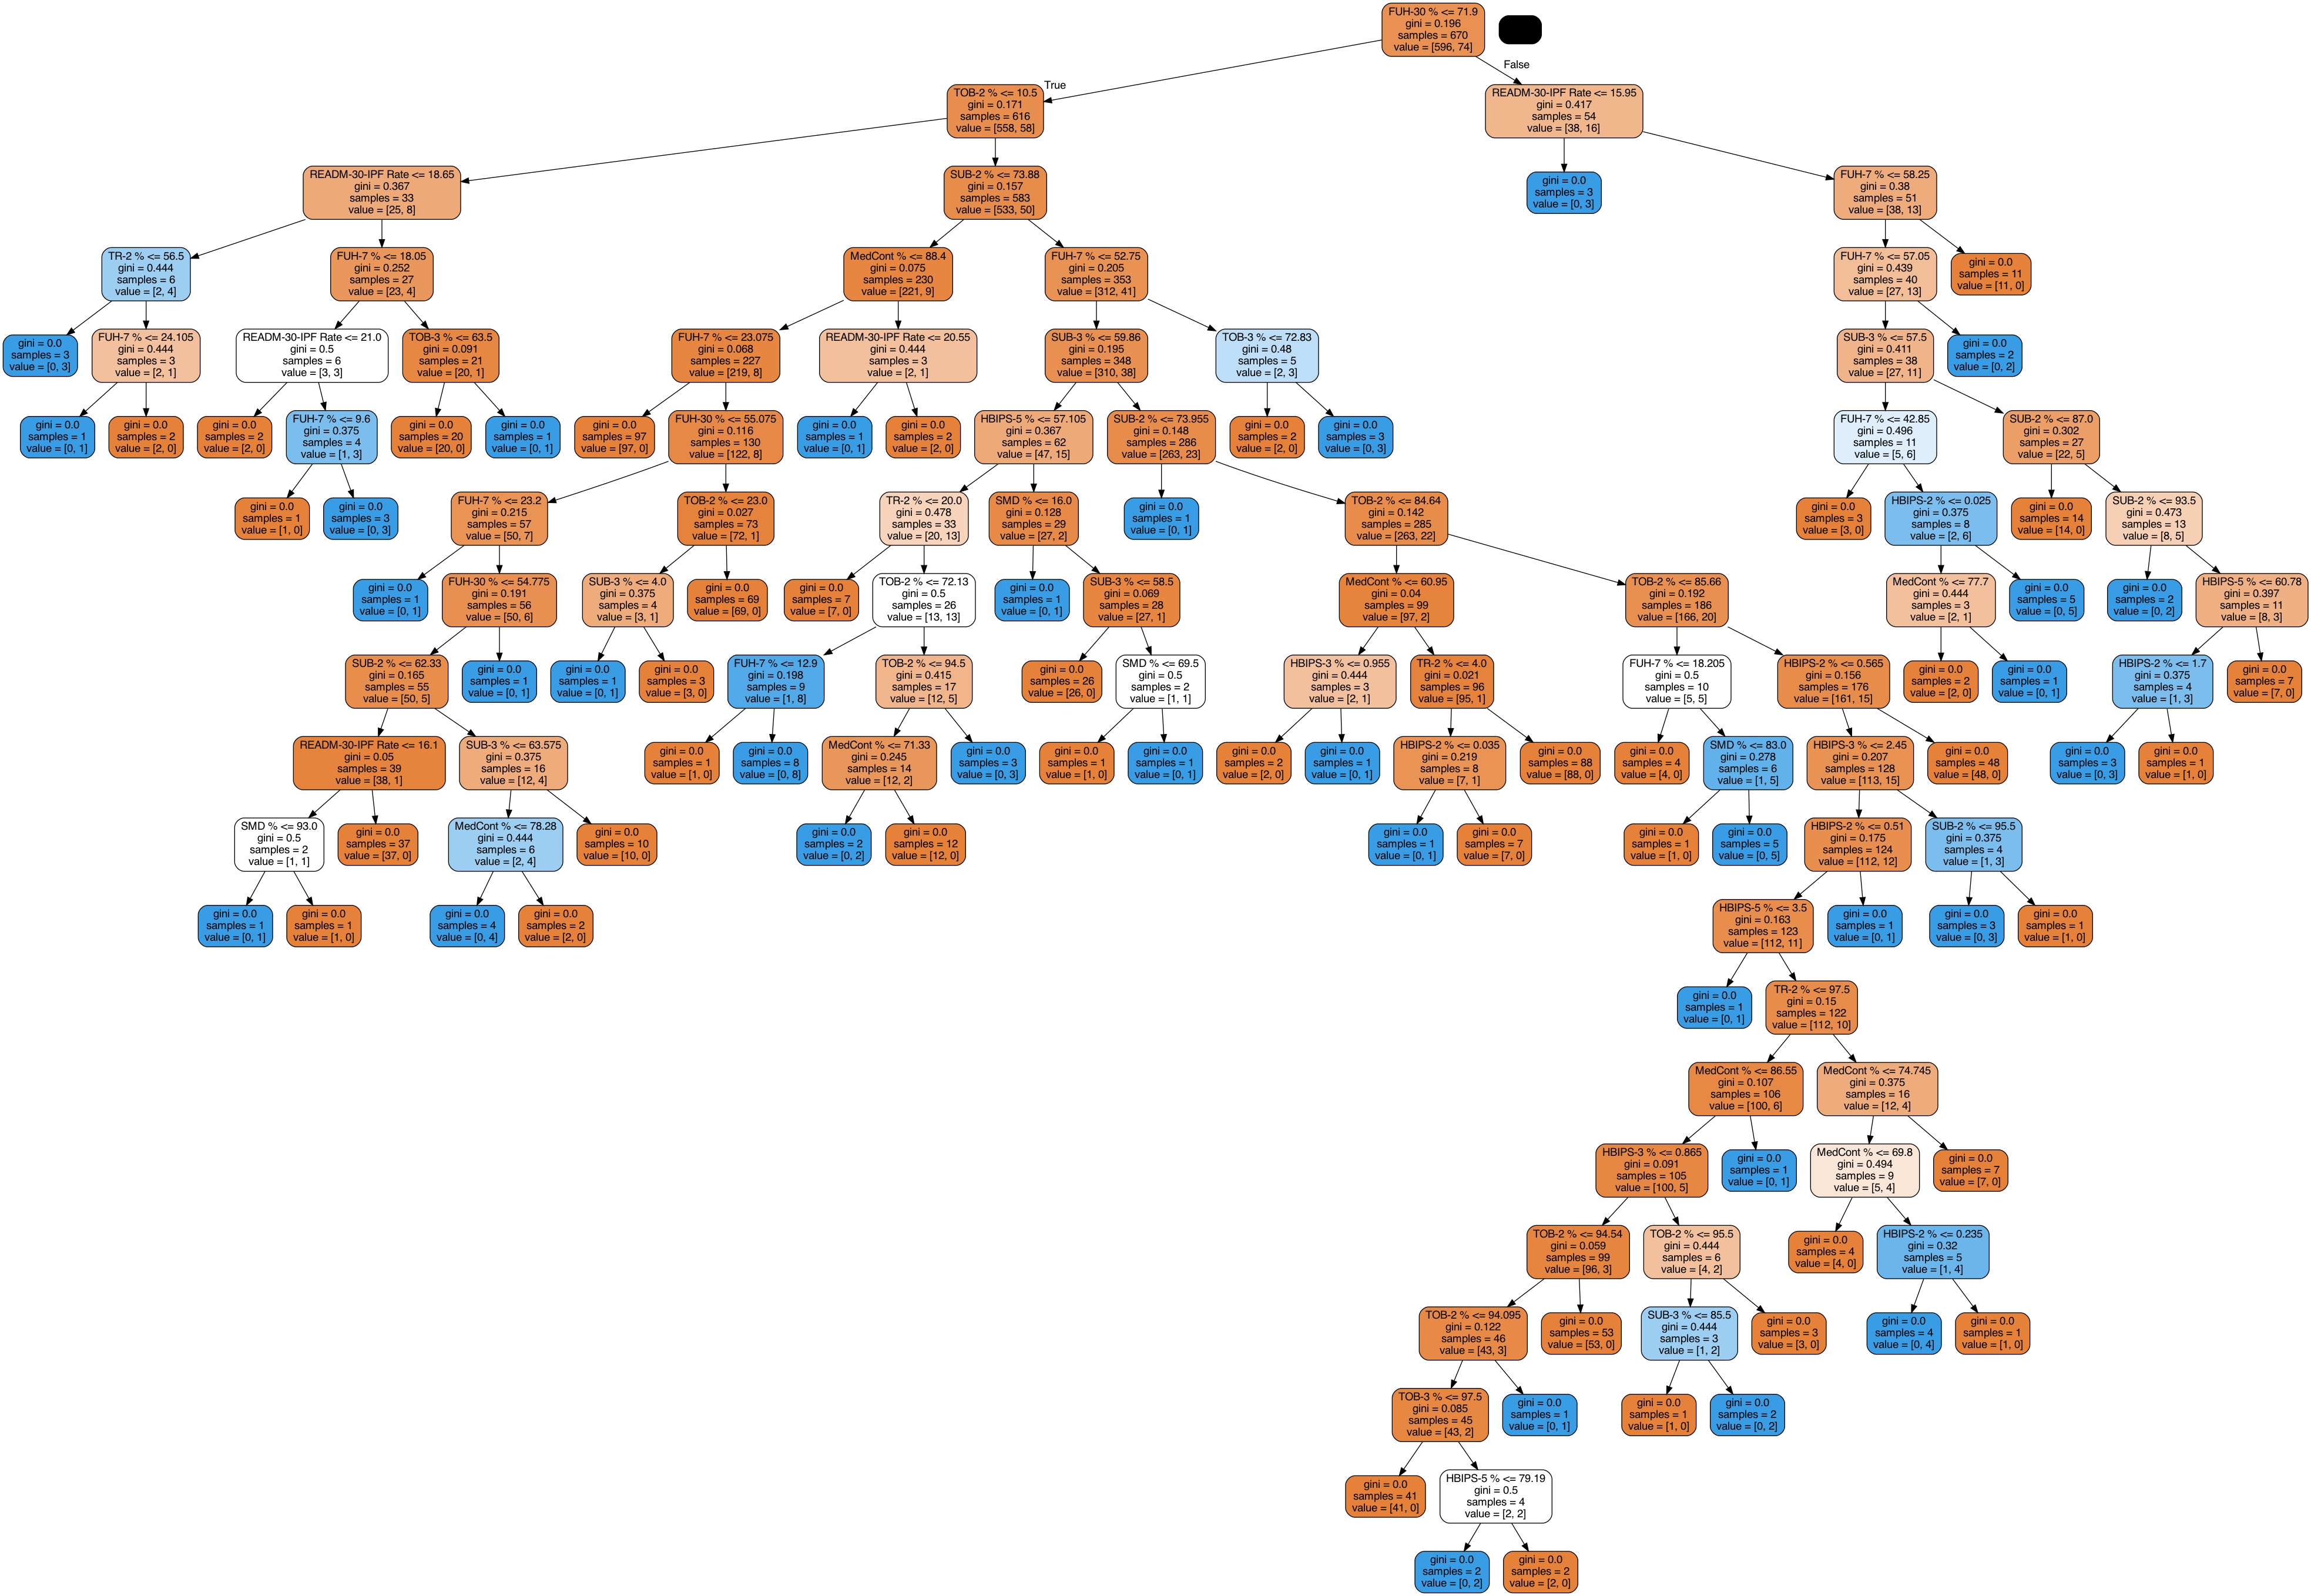

In [102]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [103]:
#Want to see the difference this tree VERSUS 10000 trees

rfc = RandomForestClassifier(n_estimators=10000, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10000, random_state=0)

In [104]:
rfc_pred = rfc.predict(X_test)

In [105]:
print(classification_report(Y_test, rfc_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       200
           1       0.00      0.00      0.00        24

    accuracy                           0.89       224
   macro avg       0.45      0.50      0.47       224
weighted avg       0.80      0.89      0.84       224



After running the 100000 decision trees, we can see that it has improved our classification report from previously.

## Rating our unrated facilities

In [106]:
fac_w_no_rating = df_final[(df_final["Hospital overall rating"] == -1)]

In [107]:
fac_w_no_rating.head(2)

Facility Name        City State  ZIP Code  HBIPS-5 %  \
1    CRENSHAW COMMUNITY HOSPITAL     LUVERNE    AL     36049     100.00   
18  GROVE HILL MEMORIAL HOSPITAL  GROVE HILL    AL     36451      44.51   

    SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  ...  FUH-30 %  FUH-7 %  \
1   100.0    21.00     3.00     95.0    87.00  ...     42.10     5.30   
18   98.0    59.08    57.08     42.0    39.27  ...     46.59    24.06   

    MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  \
1       82.10               21.5       0.09       0.38  31.754655 -86.291595   
18      73.58               18.2       0.00       0.00  31.704953 -87.801307   

    Hospital overall rating  Five Stars  
1                        -1           0  
18                       -1           0  

[2 rows x 21 columns]

In [108]:
fac_w_no_rating.iloc[:, 4:17]

HBIPS-5 %  SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  TR-2 %  FUH-30 %  \
1        100.00  100.0    21.00     3.00     95.0    87.00   100.0     42.10   
18        44.51   98.0    59.08    57.08     42.0    39.27     0.0     46.59   
22        19.00   80.0    89.00    82.00     60.0    70.00    68.0     35.00   
33       100.00   99.0   100.00    99.00    100.0    99.00    94.0     57.88   
34         0.00   55.0     0.00     0.00      0.0     0.00   100.0     53.97   
...         ...    ...      ...      ...      ...      ...     ...       ...   
1555      36.00   78.0    98.00    86.00     41.0    41.00     0.0     59.30   
1556      55.00   56.0    58.00    27.00     94.0    10.00    89.0     61.70   
1560      31.00   59.0   100.00    65.00     99.0    83.00    80.0     36.70   
1561      55.00   48.0    94.00    78.00     81.0    69.00    49.0     48.30   
1562       0.00    0.0    90.00     0.00     99.0     0.00     0.0     57.60   

      FUH-7 %  MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %  
1        5.30      82.10              21.50       0.09       0.38  
18      24.06      73.58              18.20       0.00       0.00  
22      25.00      78.13              18.30       0.00       1.24  
33      34.09      75.41              22.01       0.07       0.00  
34      30.62      69.47              20.50       0.16       0.00  
...       ...        ...                ...        ...        ...  
1555    33.30      71.58              22.70       0.08       0.01  
1556    23.40      78.00              20.70       0.28       0.10  
1560    20.00      72.40              19.90       0.09       0.16  
1561    31.00      71.90              26.00       0.10       1.61  
1562    45.50      64.60              22.20       0.03       0.32  

[669 rows x 13 columns]

In [109]:
rating = rfc.predict(fac_w_no_rating.iloc[:, 4:17])

In [110]:
rating

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
fac_w_no_rating['Predicted Rating'] = rating.tolist()

/var/folders/6q/qdf21ymd471dgvtwtjd3fpsm0000gn/T/ipykernel_39009/1587912907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fac_w_no_rating['Predicted Rating'] = rating.tolist()


In [112]:
fac_w_no_rating

Facility Name           City State  ZIP Code  \
1               CRENSHAW COMMUNITY HOSPITAL        LUVERNE    AL     36049   
18             GROVE HILL MEMORIAL HOSPITAL     GROVE HILL    AL     36451   
22                  BULLOCK COUNTY HOSPITAL  UNION SPRINGS    AL     36089   
33    HILL CREST BEHAVIORAL HEALTH SERVICES     BIRMINGHAM    AL     35212   
34                   MOUNTAIN VIEW HOSPITAL        GADSDEN    AL     35902   
...                                     ...            ...   ...       ...   
1555              BELLIN PSYCHIATRIC CENTER      GREEN BAY    WI     54301   
1556         WILLOW CREEK BEHAVIORAL HEALTH      GREEN BAY    WI     54311   
1560           WYOMING BEHAVIORAL INSTITUTE         CASPER    WY     82609   
1561                       MAYHILL HOSPITAL         DENTON    TX     76208   
1562                        ASPIRE HOSPITAL         CONROE    TX     77304   

      HBIPS-5 %  SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  ...  FUH-7 %  \
1        100.00  100.0    21.00     3.00     95.0    87.00  ...     5.30   
18        44.51   98.0    59.08    57.08     42.0    39.27  ...    24.06   
22        19.00   80.0    89.00    82.00     60.0    70.00  ...    25.00   
33       100.00   99.0   100.00    99.00    100.0    99.00  ...    34.09   
34         0.00   55.0     0.00     0.00      0.0     0.00  ...    30.62   
...         ...    ...      ...      ...      ...      ...  ...      ...   
1555      36.00   78.0    98.00    86.00     41.0    41.00  ...    33.30   
1556      55.00   56.0    58.00    27.00     94.0    10.00  ...    23.40   
1560      31.00   59.0   100.00    65.00     99.0    83.00  ...    20.00   
1561      55.00   48.0    94.00    78.00     81.0    69.00  ...    31.00   
1562       0.00    0.0    90.00     0.00     99.0     0.00  ...    45.50   

      MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat  \
1         82.10              21.50       0.09       0.38  31.754655   
18        73.58              18.20       0.00       0.00  31.704953   
22        78.13              18.30       0.00       1.24  32.142191   
33        75.41              22.01       0.07       0.00  33.547803   
34        69.47              20.50       0.16       0.00  33.984062   
...         ...                ...        ...        ...        ...   
1555      71.58              22.70       0.08       0.01  44.494385   
1556      78.00              20.70       0.28       0.10  44.523605   
1560      72.40              19.90       0.09       0.16  42.811163   
1561      71.90              26.00       0.10       1.61  33.160393   
1562      64.60              22.20       0.03       0.32  30.276638   

             lon  Hospital overall rating  Five Stars  Predicted Rating  
1     -86.291595                       -1           0                 0  
18    -87.801307                       -1           0                 0  
22    -85.742406                       -1           0                 0  
33    -86.749538                       -1           0                 0  
34    -85.803434                       -1           0                 0  
...          ...                      ...         ...               ...  
1555  -87.976051                       -1           0                 0  
1556  -87.957687                       -1           0                 0  
1560 -106.267391                       -1           0                 0  
1561  -97.095421                       -1           0                 0  
1562  -95.444823                       -1           0                 0  

[669 rows x 22 columns]

# Task 7: Visualizations 

In [113]:
fac_w_rating.head(2)

Facility Name        City State  ZIP Code  HBIPS-5 %  SMD %  \
0  MIZELL MEMORIAL HOSPITAL         OPP    AL     36467      100.0  100.0   
2        ST. VINCENT'S EAST  BIRMINGHAM    AL     35235        0.0    5.0   

   SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  TR-2 %  FUH-30 %  FUH-7 %  MedCont %  \
0     96.0    100.0    100.0    100.0   100.0     60.22    36.17      79.35   
2     28.0     15.0      2.0      3.0    63.0     39.20    20.30      74.90   

   READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  Five Stars  
0               17.8       0.00       0.00  31.260401 -86.356208           0  
2               20.3       0.91       0.29  33.632816 -86.649293           0

In [114]:
fac_w_no_rating.head(2)

Facility Name        City State  ZIP Code  HBIPS-5 %  \
1    CRENSHAW COMMUNITY HOSPITAL     LUVERNE    AL     36049     100.00   
18  GROVE HILL MEMORIAL HOSPITAL  GROVE HILL    AL     36451      44.51   

    SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  ...  FUH-7 %  MedCont %  \
1   100.0    21.00     3.00     95.0    87.00  ...     5.30      82.10   
18   98.0    59.08    57.08     42.0    39.27  ...    24.06      73.58   

    READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  \
1                21.5       0.09       0.38  31.754655 -86.291595   
18               18.2       0.00       0.00  31.704953 -87.801307   

    Hospital overall rating  Five Stars  Predicted Rating  
1                        -1           0                 0  
18                       -1           0                 0  

[2 rows x 22 columns]

In [115]:
fac_w_no_rating.drop(columns = ['Hospital overall rating'], inplace = True)

/var/folders/6q/qdf21ymd471dgvtwtjd3fpsm0000gn/T/ipykernel_39009/3627752379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fac_w_no_rating.drop(columns = ['Hospital overall rating'], inplace = True)


In [116]:
fac_w_no_rating.head(2)

Facility Name        City State  ZIP Code  HBIPS-5 %  \
1    CRENSHAW COMMUNITY HOSPITAL     LUVERNE    AL     36049     100.00   
18  GROVE HILL MEMORIAL HOSPITAL  GROVE HILL    AL     36451      44.51   

    SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  ...  FUH-30 %  FUH-7 %  \
1   100.0    21.00     3.00     95.0    87.00  ...     42.10     5.30   
18   98.0    59.08    57.08     42.0    39.27  ...     46.59    24.06   

    MedCont %  READM-30-IPF Rate  HBIPS-2 %  HBIPS-3 %        lat        lon  \
1       82.10               21.5       0.09       0.38  31.754655 -86.291595   
18      73.58               18.2       0.00       0.00  31.704953 -87.801307   

    Five Stars  Predicted Rating  
1            0                 0  
18           0                 0  

[2 rows x 21 columns]

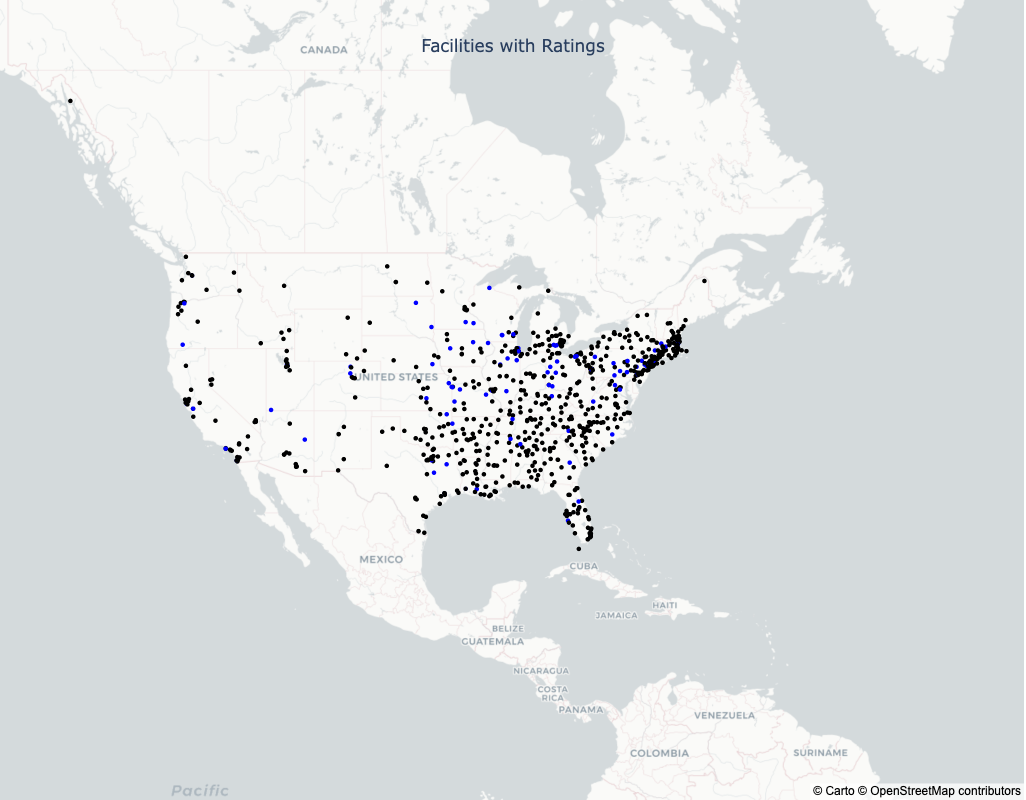

In [117]:
#Visualizing the Dataset:
fig = px.scatter_mapbox(fac_w_rating,
                        lat="lat",
                        lon="lon",
                        title = "Facilities with Ratings",
                        zoom = 2.75,
                        hover_name="Facility Name",
                        hover_data= ['Five Stars','HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %'], 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":2,"t":0,"l":0,"b":0})
fig.update_layout(title_x=0.5, title_y=.95)
d = {0: "black", 1: "blue"}
colors=[d[k] for k in fac_w_rating['Five Stars'].values]
fig.update_traces(marker_size = 5, marker_color = colors )
fig.show()

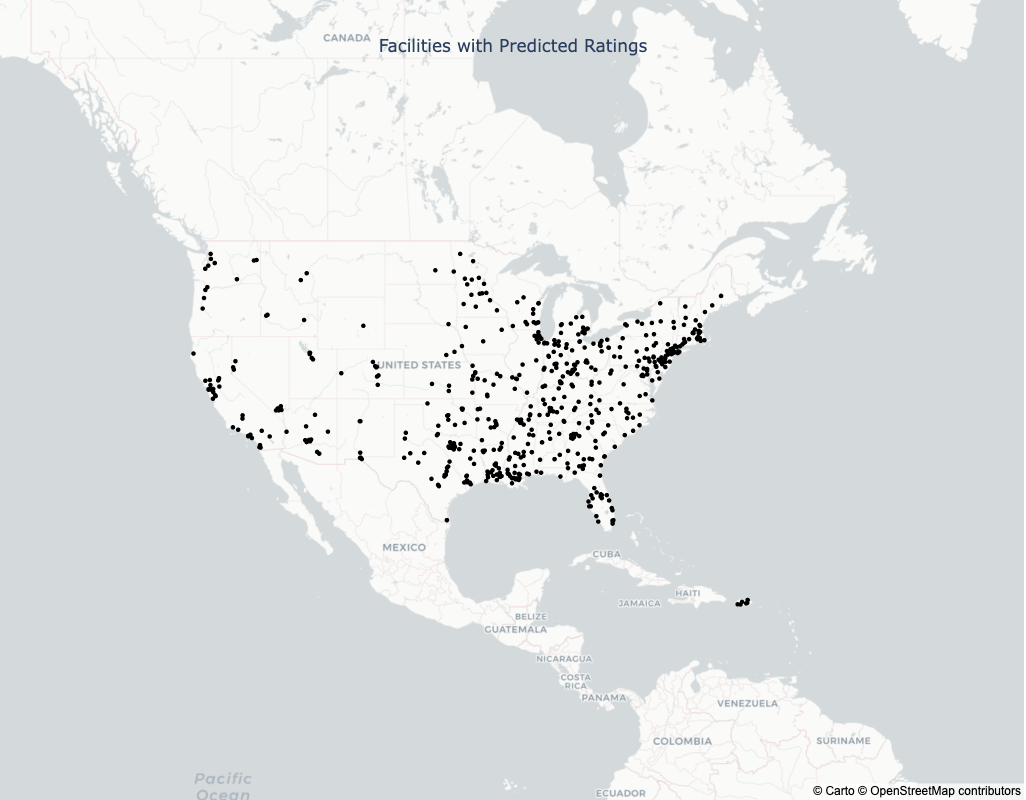

In [118]:
#Visualizing the Dataset:
fig = px.scatter_mapbox(fac_w_no_rating,
                        lat="lat",
                        lon="lon",
                        title = "Facilities with Predicted Ratings",
                        zoom = 2.75,
                        hover_name="Facility Name",
                        hover_data= ['Predicted Rating','HBIPS-5 %', 'SMD %','SUB-2 %', 'SUB-3 %', 'TOB-2 %', 'TOB-3 %', 'TR-2 %', 'FUH-30 %','FUH-7 %', 'MedCont %', 'READM-30-IPF Rate', 'HBIPS-2 %', 'HBIPS-3 %'], 
                        height=800,
                        width=800)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":2,"t":0,"l":0,"b":0})
fig.update_layout(title_x=0.5, title_y=.95)
d = {0: "black", 1: "blue"}
colors=[d[k] for k in fac_w_no_rating['Predicted Rating'].values]
fig.update_traces(marker_size = 5, marker_color = colors )
fig.show()

In [119]:
df_final[df_final['Five Stars'] == 1]

Facility Name             City  \
26                          LAKELAND COMMUNITY HOSPITAL       HALEYVILLE   
53            SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER         SHOW LOW   
111                            PENINSULA MEDICAL CENTER       BURLINGAME   
113   UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR        SAN DIEGO   
119                 GLENDALE MEM HOSPITAL & HLTH CENTER         GLENDALE   
...                                                 ...              ...   
1536            SSM HEALTH ST MARY'S HOSPITAL - MADISON          MADISON   
1537                                   MERITER HOSPITAL          MADISON   
1538    UNIVERSITY OF WI  HOSPITALS & CLINICS AUTHORITY          MADISON   
1539                        COMMUNITY MEMORIAL HOSPITAL  MENOMONEE FALLS   
1544                            MEMORIAL MEDICAL CENTER          ASHLAND   

     State  ZIP Code  HBIPS-5 %   SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  \
26      AL     35565      45.82   92.00    95.46    56.09    89.00    73.00   
53      AZ     85901      71.02  100.00    87.00    54.00   100.00    52.00   
111     CA     94010      86.00   62.00    93.00    62.00    61.00    21.00   
113     CA     92103      80.50   92.00    81.00    86.00    94.00    71.00   
119     CA     91204       0.00   36.00     2.00    16.00     0.00     0.00   
...    ...       ...        ...     ...      ...      ...      ...      ...   
1536    WI     53715      42.99   38.00    92.00    52.00    54.00    86.00   
1537    WI     53715      81.61   79.00    79.00    67.00     2.00     1.00   
1538    WI     53792      89.80   88.39    94.69    93.28    94.19    43.91   
1539    WI     53051      75.00   90.00    65.00    40.00    67.00     1.00   
1544    WI     54806      75.00   93.00   100.00   100.00    98.00     0.00   

      ...  FUH-30 %  FUH-7 %  MedCont %  READM-30-IPF Rate  HBIPS-2 %  \
26    ...     49.13    26.31      71.23              19.40       0.00   
53    ...     41.24    19.31      71.85              19.22       0.14   
111   ...     57.10    40.00      59.30              21.30       0.53   
113   ...     74.40    59.00      77.76              15.80       0.29   
119   ...     25.00    16.70      71.20              23.40       1.10   
...   ...       ...      ...        ...                ...        ...   
1536  ...     56.10    25.80      86.80              16.70       0.03   
1537  ...     54.20    29.20      91.30              18.60       0.04   
1538  ...     48.03    25.34      75.47              21.37       0.21   
1539  ...     53.10    37.50      75.80              20.30       0.20   
1544  ...     64.00    40.00      69.97              19.70       0.11   

      HBIPS-3 %        lat         lon  Hospital overall rating  Five Stars  
26         0.00  34.179569  -87.505293                        5           1  
53         0.00  34.570811 -110.032025                        5           1  
111        1.06  37.567086 -122.367573                        5           1  
113        0.40  32.746085 -117.170517                        5           1  
119        0.05  33.786594 -118.298662                        5           1  
...         ...        ...         ...                      ...         ...  
1536       0.02  43.061839  -89.394619                        5           1  
1537       0.00  43.061839  -89.394619                        5           1  
1538       0.16  43.069560  -89.423861                        5           1  
1539       0.00  43.124189  -88.227543                        5           1  
1544       0.00  46.558577  -90.738773                        5           1  

[98 rows x 21 columns]

In [120]:
fac_w_rating[fac_w_rating['Five Stars'] == 1].iloc[:, 4:17].describe()

HBIPS-5 %       SMD %     SUB-2 %     SUB-3 %     TOB-2 %     TOB-3 %  \
count   98.000000   98.000000   98.000000   98.000000   98.000000   98.000000   
mean    59.018673   83.696327   73.541837   66.115000   74.979388   54.399694   
std     26.514083   20.996494   28.896991   28.269143   28.121678   34.211742   
min      0.000000    4.000000    0.000000    0.000000    0.000000    0.000000   
25%     38.965000   81.500000   64.430000   51.295000   68.007500   26.362500   
50%     62.625000   91.000000   83.675000   67.885000   85.660000   61.880000   
75%     81.000000   95.000000   93.815000   90.000000   93.000000   83.787500   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

           TR-2 %    FUH-30 %    FUH-7 %  MedCont %  READM-30-IPF Rate  \
count   98.000000   98.000000  98.000000  98.000000          98.000000   
mean    57.503163   56.729490  32.255510  75.962245          19.966224   
std     33.318072   14.951148  13.290506   5.581435           2.395779   
min      0.000000   18.200000   0.000000  59.300000          14.500000   
25%     29.000000   46.302500  22.980000  72.365000          18.425000   
50%     61.515000   56.210000  29.450000  75.555000          20.170000   
75%     89.750000   66.700000  40.675000  78.777500          21.275000   
max    100.000000  100.000000  60.000000  91.300000          27.200000   

       HBIPS-2 %  HBIPS-3 %  
count  98.000000  98.000000  
mean    0.414286   0.475102  
std     0.905624   0.895160  
min     0.000000   0.000000  
25%     0.010000   0.000000  
50%     0.140000   0.070000  
75%     0.452500   0.527500  
max     7.340000   4.710000

In [121]:
fac_w_no_rating.iloc[:, 4:17].describe()

HBIPS-5 %       SMD %     SUB-2 %     SUB-3 %     TOB-2 %     TOB-3 %  \
count  669.000000  669.000000  669.000000  669.000000  669.000000  669.000000   
mean    58.348475   74.032975   70.755889   58.719552   76.447564   51.213677   
std     32.219583   29.076787   32.045455   33.830788   28.479797   34.812662   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     35.000000   61.000000   59.000000   34.000000   69.000000   22.000000   
50%     64.120000   85.000000   82.000000   66.000000   86.000000   55.000000   
75%     85.130000   97.000000   96.000000   89.000000   96.000000   84.000000   
max    100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   

           TR-2 %    FUH-30 %     FUH-7 %   MedCont %  READM-30-IPF Rate  \
count  669.000000  669.000000  669.000000  669.000000         669.000000   
mean    62.348999   48.837623   27.349970   72.875994          20.120463   
std     33.645012   13.072987   10.532405    6.822107           2.701770   
min      0.000000    0.000000    0.000000    0.000000          12.700000   
25%     40.000000   41.200000   20.400000   70.180000          18.400000   
50%     72.000000   48.130000   26.700000   73.410000          19.920000   
75%     92.000000   57.040000   33.300000   76.880000          21.700000   
max    100.000000   96.000000   72.000000   90.900000          36.600000   

        HBIPS-2 %   HBIPS-3 %  
count  669.000000  669.000000  
mean     0.540045    0.427877  
std      1.764948    1.214551  
min      0.000000    0.000000  
25%      0.020000    0.000000  
50%      0.110000    0.060000  
75%      0.390000    0.310000  
max     25.350000   17.270000

In [122]:
fac_w_rating[fac_w_rating['Five Stars'] == 1]

Facility Name             City  \
26                          LAKELAND COMMUNITY HOSPITAL       HALEYVILLE   
53            SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER         SHOW LOW   
111                            PENINSULA MEDICAL CENTER       BURLINGAME   
113   UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR        SAN DIEGO   
119                 GLENDALE MEM HOSPITAL & HLTH CENTER         GLENDALE   
...                                                 ...              ...   
1536            SSM HEALTH ST MARY'S HOSPITAL - MADISON          MADISON   
1537                                   MERITER HOSPITAL          MADISON   
1538    UNIVERSITY OF WI  HOSPITALS & CLINICS AUTHORITY          MADISON   
1539                        COMMUNITY MEMORIAL HOSPITAL  MENOMONEE FALLS   
1544                            MEMORIAL MEDICAL CENTER          ASHLAND   

     State  ZIP Code  HBIPS-5 %   SMD %  SUB-2 %  SUB-3 %  TOB-2 %  TOB-3 %  \
26      AL     35565      45.82   92.00    95.46    56.09    89.00    73.00   
53      AZ     85901      71.02  100.00    87.00    54.00   100.00    52.00   
111     CA     94010      86.00   62.00    93.00    62.00    61.00    21.00   
113     CA     92103      80.50   92.00    81.00    86.00    94.00    71.00   
119     CA     91204       0.00   36.00     2.00    16.00     0.00     0.00   
...    ...       ...        ...     ...      ...      ...      ...      ...   
1536    WI     53715      42.99   38.00    92.00    52.00    54.00    86.00   
1537    WI     53715      81.61   79.00    79.00    67.00     2.00     1.00   
1538    WI     53792      89.80   88.39    94.69    93.28    94.19    43.91   
1539    WI     53051      75.00   90.00    65.00    40.00    67.00     1.00   
1544    WI     54806      75.00   93.00   100.00   100.00    98.00     0.00   

      TR-2 %  FUH-30 %  FUH-7 %  MedCont %  READM-30-IPF Rate  HBIPS-2 %  \
26     92.00     49.13    26.31      71.23              19.40       0.00   
53     90.00     41.24    19.31      71.85              19.22       0.14   
111    24.00     57.10    40.00      59.30              21.30       0.53   
113    66.00     74.40    59.00      77.76              15.80       0.29   
119     0.00     25.00    16.70      71.20              23.40       1.10   
...      ...       ...      ...        ...                ...        ...   
1536   29.00     56.10    25.80      86.80              16.70       0.03   
1537   46.00     54.20    29.20      91.30              18.60       0.04   
1538   45.27     48.03    25.34      75.47              21.37       0.21   
1539    0.00     53.10    37.50      75.80              20.30       0.20   
1544   80.00     64.00    40.00      69.97              19.70       0.11   

      HBIPS-3 %        lat         lon  Five Stars  
26         0.00  34.179569  -87.505293           1  
53         0.00  34.570811 -110.032025           1  
111        1.06  37.567086 -122.367573           1  
113        0.40  32.746085 -117.170517           1  
119        0.05  33.786594 -118.298662           1  
...         ...        ...         ...         ...  
1536       0.02  43.061839  -89.394619           1  
1537       0.00  43.061839  -89.394619           1  
1538       0.16  43.069560  -89.423861           1  
1539       0.00  43.124189  -88.227543           1  
1544       0.00  46.558577  -90.738773           1  

[98 rows x 20 columns]

In [123]:
fac_w_no_rating[fac_w_no_rating['Five Stars'] == 1]

Empty DataFrame
Columns: [Facility Name, City, State, ZIP Code, HBIPS-5 %, SMD %, SUB-2 %, SUB-3 %, TOB-2 %, TOB-3 %, TR-2 %, FUH-30 %, FUH-7 %, MedCont %, READM-30-IPF Rate, HBIPS-2 %, HBIPS-3 %, lat, lon, Five Stars, Predicted Rating]
Index: []

[0 rows x 21 columns]

## Feature Importance and Evaluation Metrics

In [124]:
from yellowbrick.model_selection import FeatureImportances

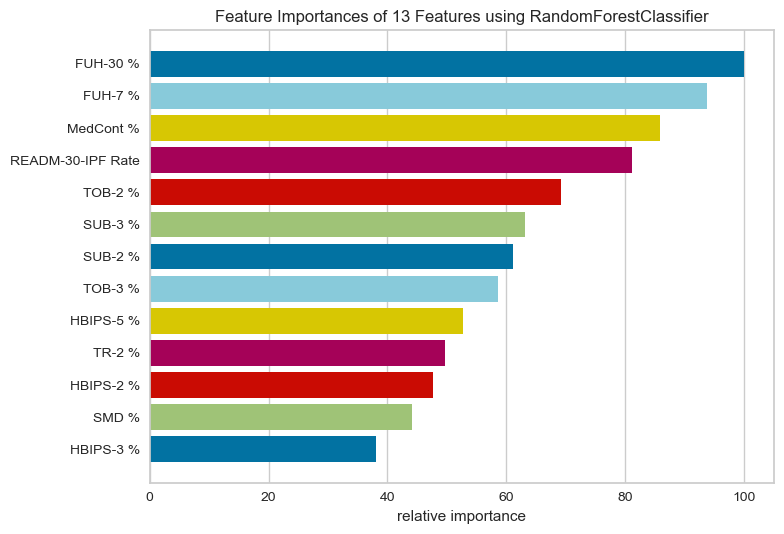

<AxesSubplot:title={'center':'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [125]:
rf = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=1,
                       warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train, Y_train)
viz.show()

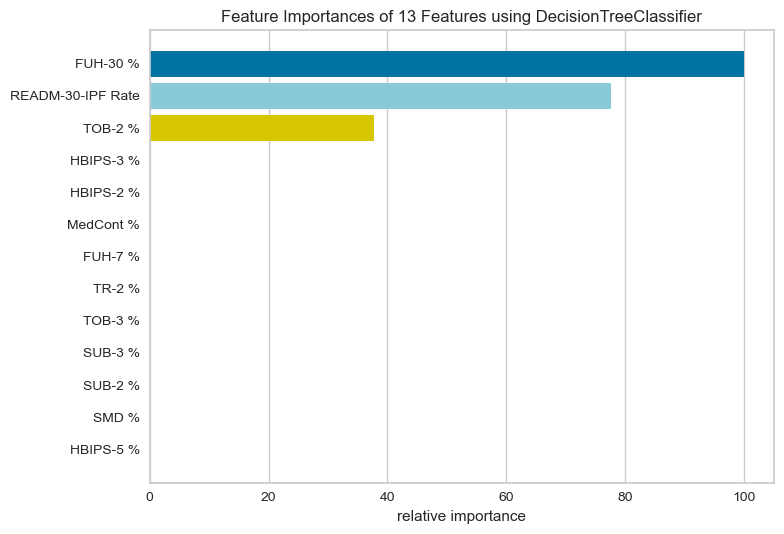

<AxesSubplot:title={'center':'Feature Importances of 13 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [126]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train, Y_train)
viz.show()

# Task 8: Conclusions 

- There were 98 facilities rated before our machine learning model was created that were rated 5 stars, such as NYU Langone Hospital, Stanford Health Care, Overlook Medical Center, etc.  
    - When our machine learning model was implemented on our unrated facilities none were categorized as 5 stars. 
    - Measure FUH-30%, follow-up 30 days after hospitalization for mental illness, contributed the most to our machine learning model. 
- While the machine learning model(s) were able to predict what facilities should be given 5 stars or not, it does not necessarily mean facilities rated under 5 stars are not providing quality care. 
- In the future it would be beneficial for the IPFQR to have a summarizing star rating to accurately portray what quality care is in inpatient facilities separate from the overall hospital scoring.
